## Observations and Insights 

Observations:

1. We need to clean data for any duplicate mice. When we took out duplicate Mouse ID, the total number of mice was 248. According to Pie plot, we found out that there are 51.0% male and 49.0% female mice.

2. The mouse weight and average tumor volume have the very strong positive relationship accroding to corrleation and regression plot. 

3. Compare to other drugs tested, Capomulin and Ramicane showed the higest result on reducing the tumor size. On summary table, both show low mean, ,median, variance, standard deviation and SEM.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_complete_df = pd.DataFrame(study_data_complete)
duplicateMice = study_data_complete[study_data_complete.duplicated()]
duplicateMiceDF = pd.DataFrame(duplicateMice)
duplicateMiceID = duplicateMiceDF["Mouse ID"].unique()
duplicateMiceID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
allDuplicateMice = study_data_complete.loc[study_data_complete['Mouse ID'] == "g989",:]
allDuplicateMice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMouseData = study_data_complete_df[(study_data_complete_df['Mouse ID'] != 'g989')]
cleanMouseData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleanMouseData['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drugRegimen = cleanMouseData.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume.
meanTV = drugRegimen["Tumor Volume (mm3)"].mean()
medianTV =drugRegimen["Tumor Volume (mm3)"].median()
varianceTV = drugRegimen["Tumor Volume (mm3)"].var()
stdTV = drugRegimen["Tumor Volume (mm3)"].std()
SEMTV = drugRegimen["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({ "Mean Tumor Volume":meanTV,
                              "Median Tumor Volume":medianTV,
                              "Tumor Volume Variance":varianceTV,
                              "Tumor Volume Std. Dev.":stdTV,
                              "Tumor Volume Std. Err.":SEMTV    
})

# print table
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drugRegimen = cleanMouseData.groupby(["Drug Regimen"])
summaryTable = drugRegimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summaryTable

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

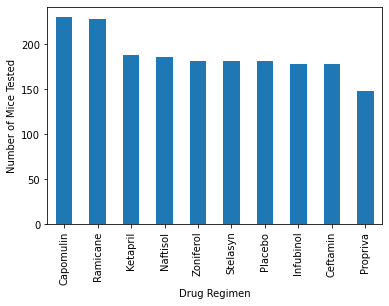

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugCount = cleanMouseData['Drug Regimen'].value_counts()
drugCount

drugBarPlot1 = drugCount.plot(kind = 'bar', xlabel= 'Drug Regimen', ylabel= 'Number of Mice Tested')
drugBarPlot1

Text(0, 0.5, 'Number of Mice Tested')

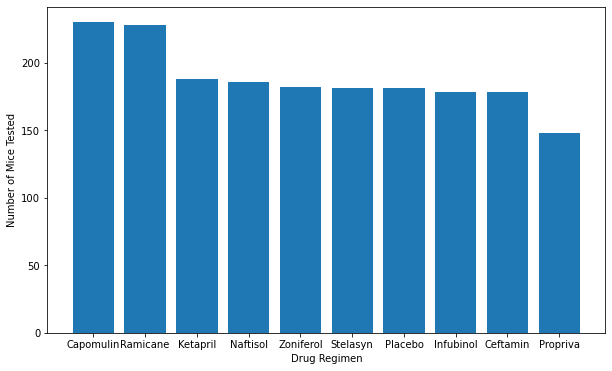

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugCount = cleanMouseData['Drug Regimen'].value_counts()
drugCount

plt.figure(figsize= (10,6))
plt.bar(drugCount.index.values, drugCount.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

<AxesSubplot:ylabel='Sex'>

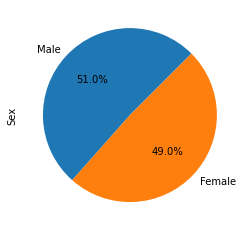

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouseGender = cleanMouseData["Sex"].value_counts()
mouseGender

mouseGenderPie = mouseGender.plot.pie(y="", autopct= "%1.1f%%", startangle= 45)
mouseGenderPie

Text(0, 0.5, 'Sex')

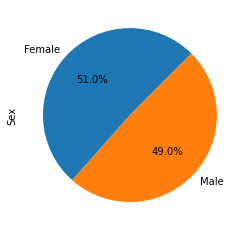

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = mouseGender
x_axis

labels = cleanMouseData["Sex"].unique()
labels

plt.pie(x_axis, labels= labels, autopct= "%1.1f%%", startangle= 45)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTimepoint = cleanMouseData.groupby(["Mouse ID"])["Timepoint"].max()
maxTimepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedDF = pd.merge(maxTimepoint, cleanMouseData, on=(["Mouse ID", "Timepoint"]))
mergedDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolList = []
outlier = []

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

for drug in treatmentList:
    tvRegimen = mergedDF.loc[mergedDF["Drug Regimen"] == drug]
    tumorVolume = tvRegimen["Tumor Volume (mm3)"]
    tumorVolList.append(tumorVolume)
    
#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Determine outliers using upper and lower bounds
quart0 = tumorVolList[0].quantile([.25,.5,.75])
lowerQ0 = quart0[0.25]
upperQ0 = quart0[0.75]
IQR0 = upperQ0-lowerQ0
lowerBound0 = lowerQ0 - (1.5*IQR0)
upperBound0 = upperQ0 + (1.5*IQR0)

quart1 = tumorVolList[1].quantile([.25,.5,.75])
lowerQ1 = quart1[0.25]
upperQ1 = quart1[0.75]
IQR1 = upperQ1-lowerQ1
lowerBound1 = lowerQ1 - (1.5*IQR1)
upperBound1 = upperQ1 + (1.5*IQR1)

quart2 = tumorVolList[2].quantile([.25,.5,.75])
lowerQ2 = quart2[0.25]
upperQ2 = quart2[0.75]
IQR2 = upperQ2-lowerQ2
lowerBound2 = lowerQ2 - (1.5*IQR2)
upperBound2 = upperQ2 + (1.5*IQR2)

quart3 = tumorVolList[3].quantile([.25,.5,.75])
lowerQ3 = quart3[0.25]
upperQ3 = quart3[0.75]
IQR3 = upperQ3-lowerQ3
lowerBound3 = lowerQ3 - (1.5*IQR3)
upperBound3 = upperQ3 + (1.5*IQR3)


print(f"{treatmentList[0]}'s potential outliers: {lowerBound0} & {upperBound0}")
print(f"{treatmentList[1]}'s potential outliers: {lowerBound1} & {upperBound1}")
print(f"{treatmentList[2]}'s potential outliers: {lowerBound2} & {upperBound2}")
print(f"{treatmentList[3]}'s potential outliers: {lowerBound3} & {upperBound3}")


outliers0 = tumorVolList[0].loc[(tumorVolList[0] < lowerBound0) | (tumorVolList[0] > upperBound0)]
len(outliers0)
outliers1 = tumorVolList[1].loc[(tumorVolList[1] < lowerBound1) | (tumorVolList[1] > upperBound1)]
len(outliers1)
outliers2 = tumorVolList[2].loc[(tumorVolList[2] < lowerBound2) | (tumorVolList[2] > upperBound2)]
len(outliers2)
outliers3 = tumorVolList[3].loc[(tumorVolList[3] < lowerBound3) | (tumorVolList[3] > upperBound3)]
len(outliers3)


Capomulin's potential outliers: 20.70456164999999 & 51.83201549
Ramicane's potential outliers: 17.912664470000003 & 54.30681135
Infubinol's potential outliers: 36.83290494999999 & 82.74144559000001
Ceftamin's potential outliers: 25.355449580000002 & 87.66645829999999


0

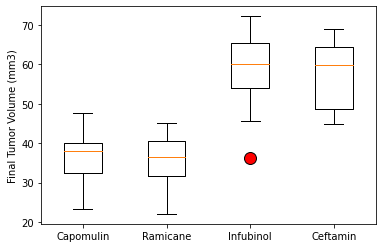

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='black')
plt.boxplot(tumorVolList, flierprops=flierprops, labels=treatmentList)
plt.ylabel('Final Tumor Volume (mm3)')


plt.show()

## Line and Scatter Plots

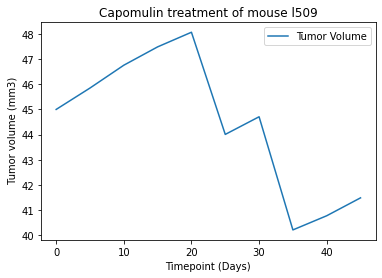

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# First, need to find the mouse treated with Capomulin
capTreatedMice = cleanMouseData.loc[cleanMouseData["Drug Regimen"] == "Capomulin"]
# capTreatedMice.value_counts("Mouse ID")
# Second, since demo used Mouse ID - l509, I'll use the same
MouseL509 = cleanMouseData.loc[cleanMouseData["Mouse ID"] == "l509"]

# Show line plot

x_axis = MouseL509["Timepoint"]
y_axis = MouseL509["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, label="Tumor Volume")
plt.legend(loc="best")
plt.xlabel("Timepoint (Days)")
plt.ylabel(" Tumor volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

Text(0, 0.5, 'Tumor volume (mm3)')

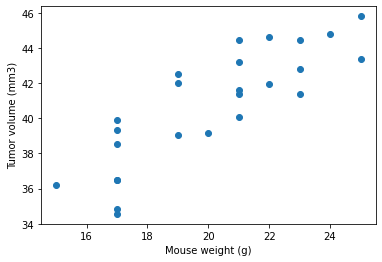

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capMouse = capTreatedMice.groupby(["Mouse ID"]).mean()

# need to get average tumor volume
averageTumorVol = capMouse["Weight (g)"]
averageWeight = capMouse["Tumor Volume (mm3)"]

plt.scatter(averageTumorVol, averageWeight, marker="o")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


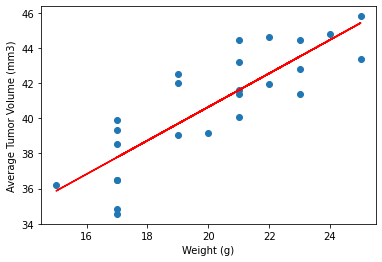

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(averageTumorVol,averageWeight)
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]:.2f}")

plt.scatter(averageTumorVol,averageWeight)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(averageTumorVol,averageWeight)
regressValue = (averageTumorVol * slope) + intercept
plt.plot(averageTumorVol, regressValue, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()